# Machine Learning 2 


# Table of Contents

* [1. Importing Libraries](#1)
* [2. Importing Data](#2)
* [3. Data Exploration](#3)
    * [3.1 Size, data types, missing features and label distribution](#3.1)
    * [3.2 Missing Data](#3.2)
    * [3.3 Finding Outliers](#3.3)
    * [3.4 Understanding How Features Interact](#3.4)
* [4. Baseline Model: Decision Tree Classifier](#4)
    * [4.1 Defining model evaluation and feature extraction functions](#4.1)
    * [4.2 Running Model](#4.2)
* [5. Changing our Model - Features](#5)
    * [5.1 Decision Tree Classifier with Extra Features](#5.1)
    * [5.2 Decision Tree Classifier with Feature Selection](#5.2) ---> on raw data + extra data
* [6. Changing our model - Algorithms](#6)
    * [6.1 Random Forest Classifier with Extra Features](#6.1)
    * [6.2 Gradient Boosted Classifier with Extra Features](#6.2)
    * [6.3 Extra Trees Classifier with Extra Features](#6.3)
* [7. Changing our model - Hyperparameter Tuning](#7)
    * [7.1 Tuned Random Forest Classifier with Extra Features](#7.1)
    * [7.2 Tuned Extra Trees Classifier with Extra Features](#7.2)
* [8. Final Model - Voting Classifier](#8)




<a id='1'></a>
## 1. Importing Libraries

In [187]:
import time
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from graphviz import Source

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (MinMaxScaler, StandardScaler, RobustScaler)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn import tree, ensemble
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc,
    classification_report
)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id='2'></a>
## 2. Importing Data

In [188]:
import pandas as pd

# Reading test set
tester = pd.read_csv('test.csv')

# Reading train set
data = pd.read_csv('train.csv').drop(columns = "Id")

<a id='3'></a>
## 3. Data Exploration

In this section we will use different methods to understand our initial data better. This will give us information for building our first baseline model.

<a id='3.1'></a>
### 3.1 Size, data types, missing features and label distribution

In [189]:
# What does this train set look like?
print(f"Number of features in train set: {data.shape[1]}")
print(f"Number of rows in trains set: {data.shape[0]}")

Number of features in train set: 55
Number of rows in trains set: 15120


In [190]:
# What does this train set look like?
print(f"Number of features in test set: {tester.shape[1]}")
print(f"Number of rows in test set: {tester.shape[0]}")

Number of features in test set: 55
Number of rows in test set: 565892


As we can see, the test set has one less feature - the target variable "Cover_type". Therefore, we cannot use this 
dataset as a test set. All model training, testing and evaluating will be conducted using the train.csv file, saved in the `data` variable. 

In [191]:
# looking for the types of the data
print(f"Types of data in dataset:\n\n{data.dtypes}")

Types of data in dataset:

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_

Each feature in our dataset is a numeric data type. However, this does not exclude the possibility that the numeric feature represents categorical or binary information, afterall, these may be represented as numeric values.

In [192]:
# Identifying data type of each feature

data_stats = data.describe()
data_stats

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...   Soil_Type32  \
count   15120.000000                        15120.000000  ...  15120.000000   
mean      135.091997                         1511.147288  ...      0.045635   
std        45.895189                         1099.936493  ...      0.208699   
min         0.000000                            0.000000  ...      0.000000   
25%       106.000000                          730.000000  ...      0.000000   
50%       138.000000                         1256.000000  ...      0.000000   
75%       167.000000                         1988.250000  ...      0.000000   
max       248.000000                         6993.000000  ...      1.000000   

        Soil_Type33   Soil_Type34   Soil_Type35   Soil_Type36   Soil_Type37  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.040741      0.001455      0.006746      0.000661      0.002249   
std        0.197696      0.038118      0.081859      0.025710      0.047368   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type38   Soil_Type39   Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  15120.000000  15120.000000  
mean       0.048148      0.043452      0.030357      4.000000  
std        0.214086      0.203880      0.171574      2.000066  
min        0.000000      0.000000      0.000000      1.000000  
25%        0.000000      0.000000      0.000000      2.000000  
50%        0.000000      0.000000      0.000000      4.000000  
75%        0.000000      0.000000      0.000000      6.000000  
max        1.000000      1.000000      1.000000      7.000000  

[8 rows x 55 columns]

By looking at summary statistics of our data, in particular "min" and "max", we see that each "Soil_Type" and "Wilderness_Area" feature is binary, encoded as 0 or 1. All remaining features are numeric, besides the target variable "Cover_Type", which is categorical. For convenience, we can go ahead and create two new dataframes based on these separate values for use down the line.

This information will also be very useful when we build a pipeline for columntransformers.

In [193]:
# Creating new dataframe of only numerical features
data_numeric = data.iloc[:, 0:10]

# Creating new dataframe of only binary features
data_binary = data.iloc[:, 10:].drop(columns = "Cover_Type")

print(f"Number of numeric features: {len(data_numeric.columns)}")
print(f"Number of binary features: {len(data_binary.columns)}")

Number of numeric features: 10
Number of binary features: 44


In [194]:
#Check target label distributions
target_prop = data["Cover_Type"].value_counts()

print(f"Proportion of target variables:\n{target_prop}")

Proportion of target variables:
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64


Our dataset is balanced. This is a huge relief as it means our model evaluation metrics, such as accuracy, are more trustworthy. Furthermore, we don't have to risk balancing the data by creating more data.

In [195]:
# Looking at the data itself
data.head(1)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   

   Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
0                                6279  ...            0            0   

   Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
0            0            0            0            0            0   

   Soil_Type39  Soil_Type40  Cover_Type  
0            0            0           5  

[1 rows x 55 columns]

<a id='3.2'></a>
### 3.2 Missing Data

In [196]:
# Looking for missing values for each feature
print(f"Number of missing values:\n{data.isna().mean()}")


Number of missing values:
Elevation                             0.0
Aspect                                0.0
Slope                                 0.0
Horizontal_Distance_To_Hydrology      0.0
Vertical_Distance_To_Hydrology        0.0
Horizontal_Distance_To_Roadways       0.0
Hillshade_9am                         0.0
Hillshade_Noon                        0.0
Hillshade_3pm                         0.0
Horizontal_Distance_To_Fire_Points    0.0
Wilderness_Area1                      0.0
Wilderness_Area2                      0.0
Wilderness_Area3                      0.0
Wilderness_Area4                      0.0
Soil_Type1                            0.0
Soil_Type2                            0.0
Soil_Type3                            0.0
Soil_Type4                            0.0
Soil_Type5                            0.0
Soil_Type6                            0.0
Soil_Type7                            0.0
Soil_Type8                            0.0
Soil_Type9                            0.0
Soil_Typ

Here we can see that we have no missing values. We not have to worry about inputing values later on.

<a id='3.3'></a>
### 3.3 Finding Outliers

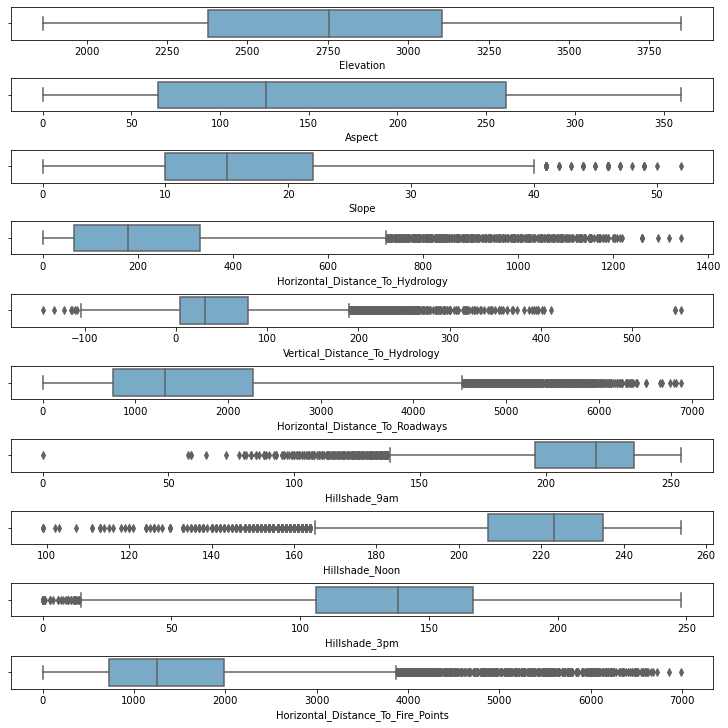

In [197]:
# Creating Box Plots
# Outliers in numerical features -> some features have large number of outliers  
fig, axes = plt.subplots(len(data_numeric.columns), 1, figsize=(10,10), constrained_layout=True)


for i, col in enumerate(data_numeric):
    sns.boxplot(x=data[col], palette='Blues_r', ax=axes[i])


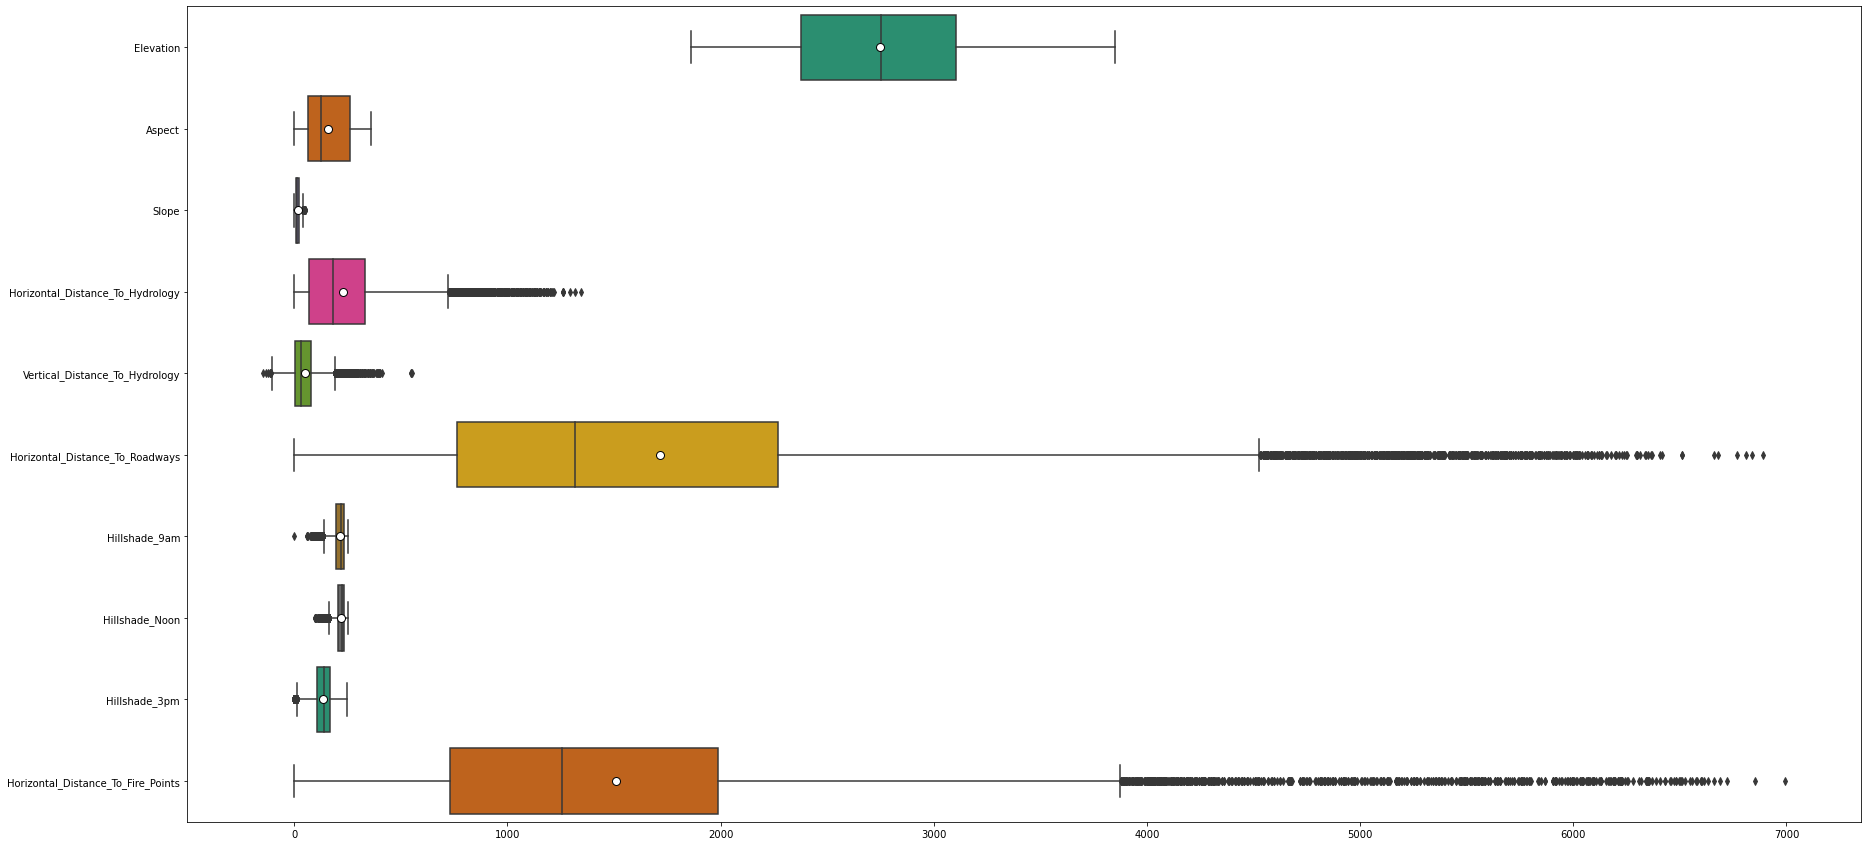

In [198]:
#Outliers in numerical features -> some features have large number of outliers  
plt.figure(figsize=(30,15))
boxplot = sns.boxplot(data=data_numeric, orient="h", palette="Dark2", showmeans=True, meanprops={"marker":"o",
"markerfacecolor":"white", "markeredgecolor":"black","markersize":"8"})

Every numerical feature besides Elevation and Aspect have outliers. This suggests we may have to consider outlier handling in our pipelines - perhaps through clamping, scaling or taking logs. Especially if we our considering using distance-based classification algorithms or feature selection techniques that are highly sensitive to ouliers.

<a id='3.4'></a>
### 3.4 Understanding How Features Interact

#### Correlations

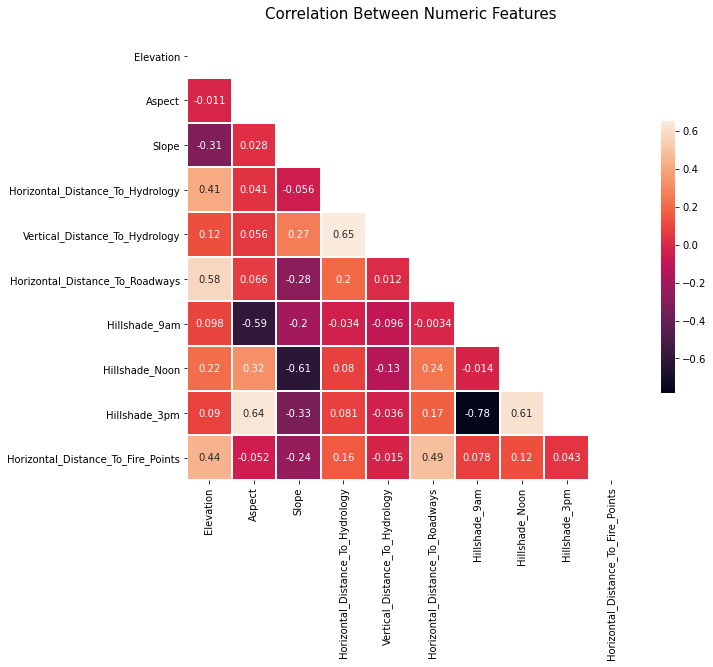

In [199]:
# Plotting correlation of numerical features as a heatmap

# Getting correlation values for numerical features
corr = data_numeric.corr()

# Plotting correlations as a heatmap
fig, ax = plt.subplots(figsize=(10,10))


# Generating a mask so that the only one half of the square has values
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
graph = sns.heatmap(corr, annot=True, mask = mask, 
                    square=True, linewidths=1, cbar_kws={"shrink": .5})

# Adding title to figure
graph.set_title("Correlation Between Numeric Features", fontsize = 15, pad = 15)
plt.show()

#### Pairplots

In [200]:
# Addding "Cover_Type" column to numeric only dataframe
data_numeric["Cover_Type"] = data["Cover_Type"]

<ipython-input-200-df2e1761b17d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_numeric["Cover_Type"] = data["Cover_Type"]


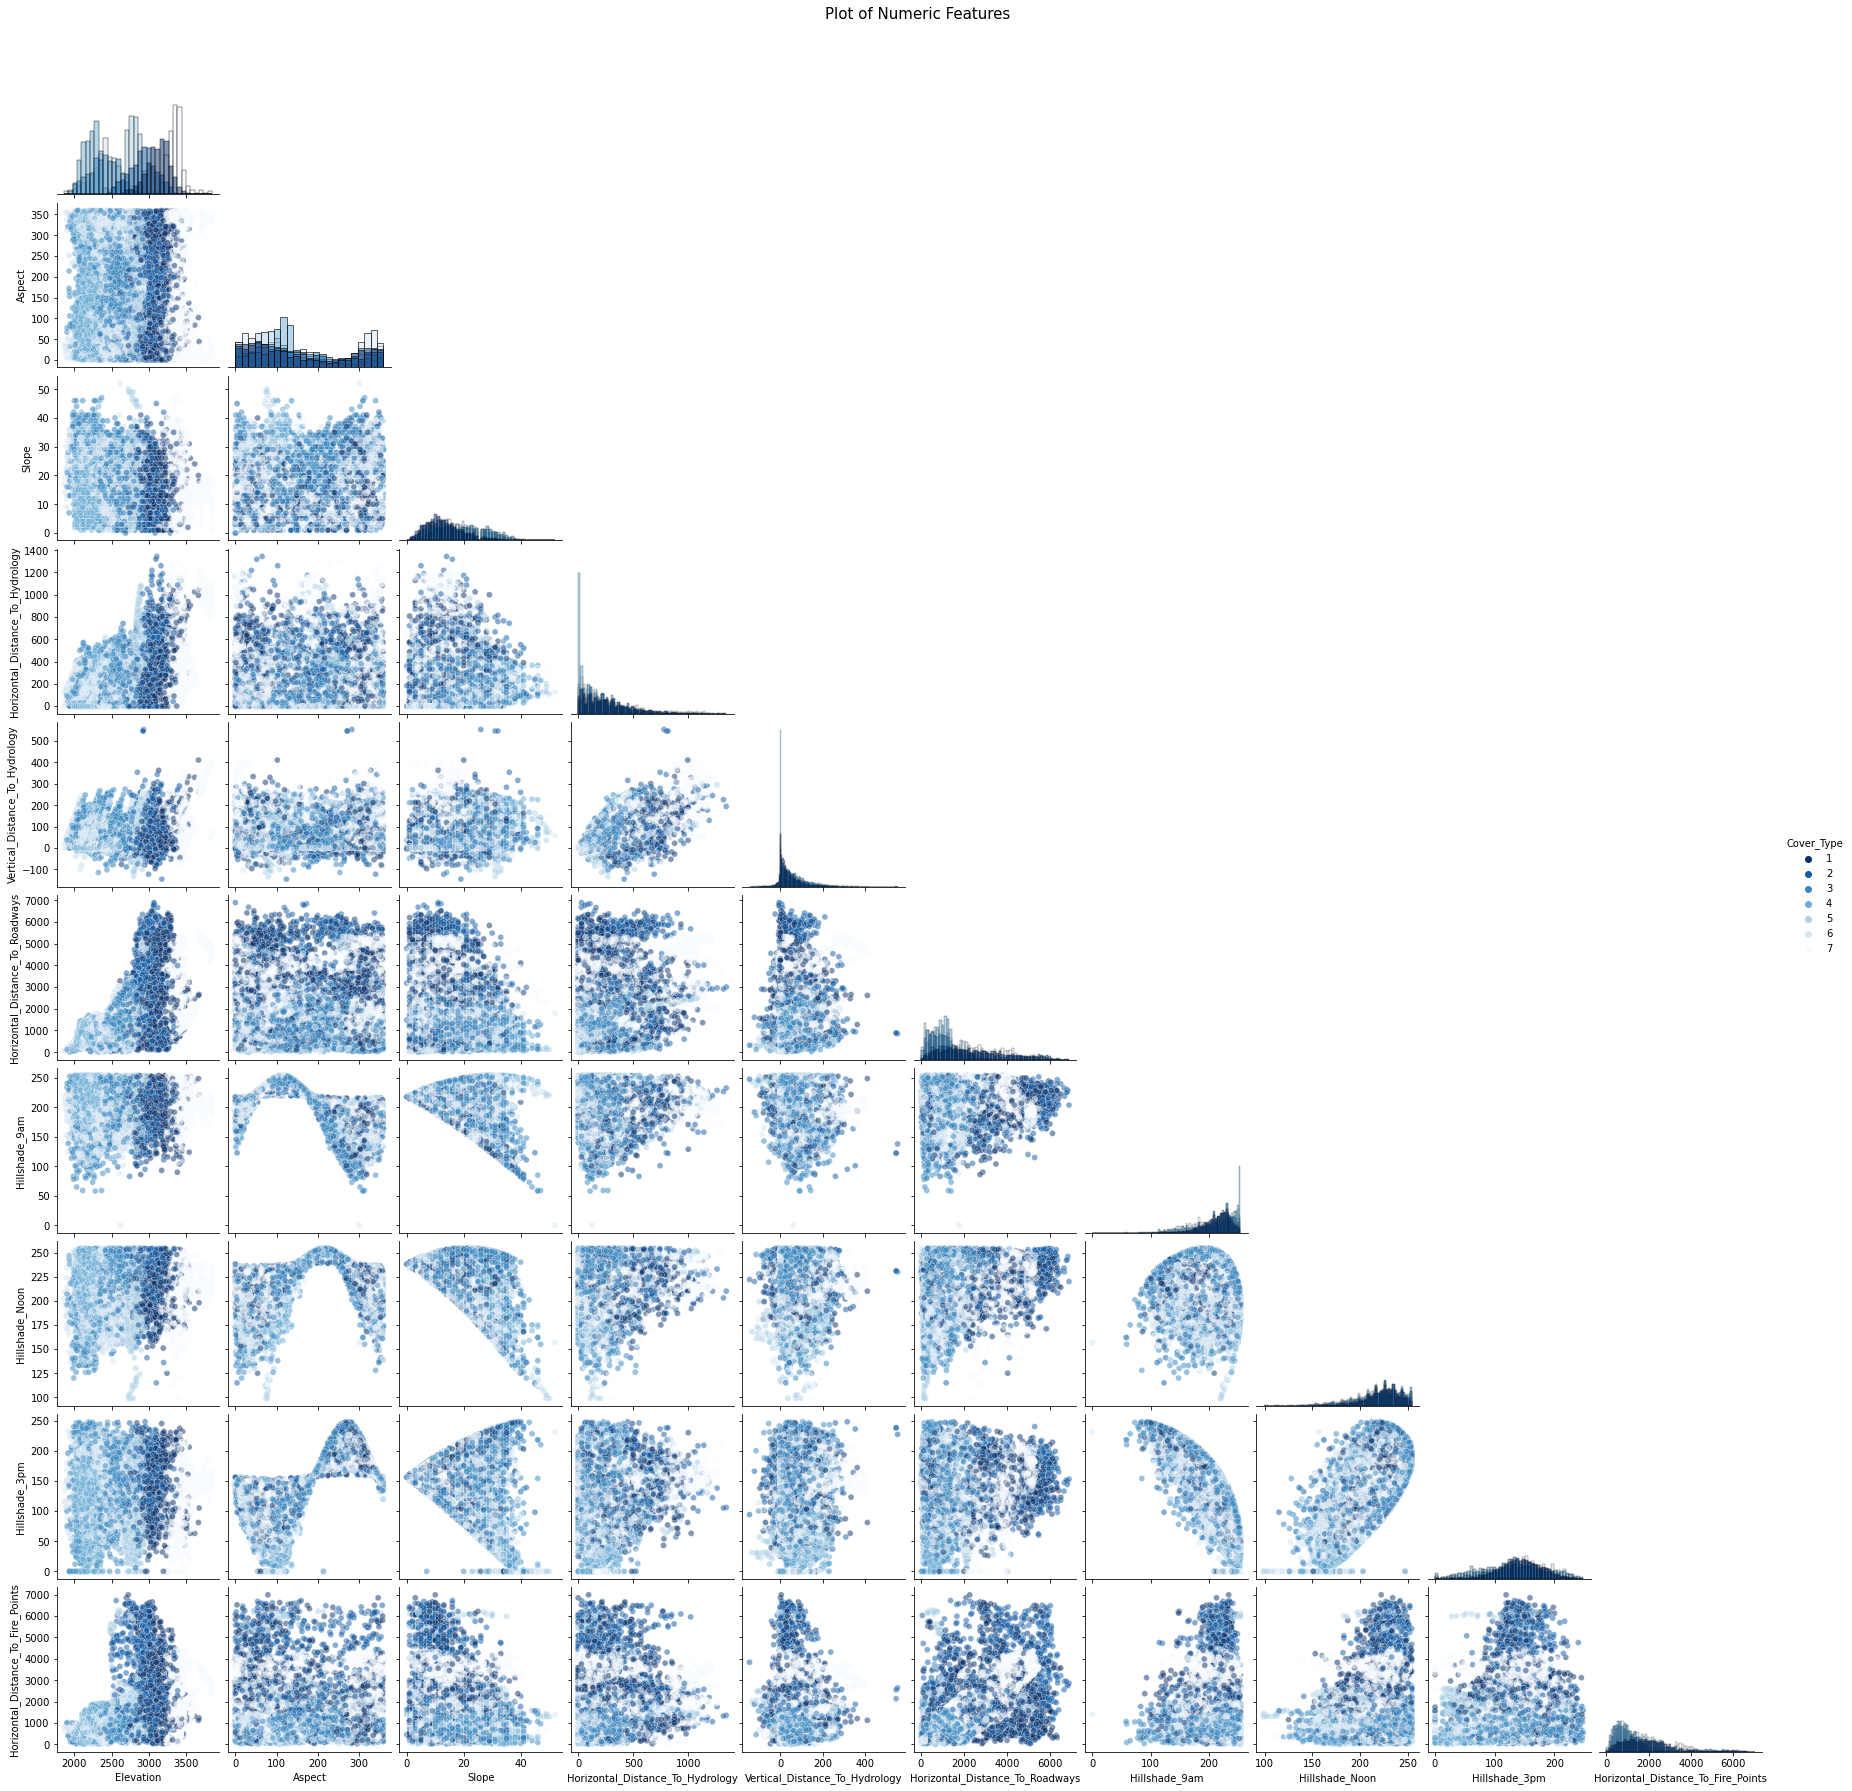

In [201]:
# Plotting scatter plots of numeric features by cover_type

# Creating pair plot
graph = sns.pairplot(data = data_numeric, 
                     hue = "Cover_Type",
                     palette='Blues_r',
                     diag_kind="hist",
                     corner=True,
                     plot_kws={'alpha': 0.5})

# Adding title to figure
graph.fig.suptitle("Plot of Numeric Features", y=1, fontsize = 15)
plt.show()

We can infer several points from the correlation and pairplot graphs. From the correlation matrix we have several pairings of highly positively and negatively correlated numeric features. From the scatter plots we can see that certain features highly influence the target variable - ...... Let's take a closer look at the interaction of these features with the "Cover_Type".

Positively correlated pairings
 - `horizontal distance to hydrology` with `Vertical distance to hydrology` and `elevation`
 - `hillshade_3pm` with `hillshade_noon` and `aspect`

Negatively correlated pairings
 - `hillshade_9am` with `aspect` and `hillshade_3pm`
 - `hillshade_noon` with `slope`


#### Visualizing Distribution of Numerical features by cover_type

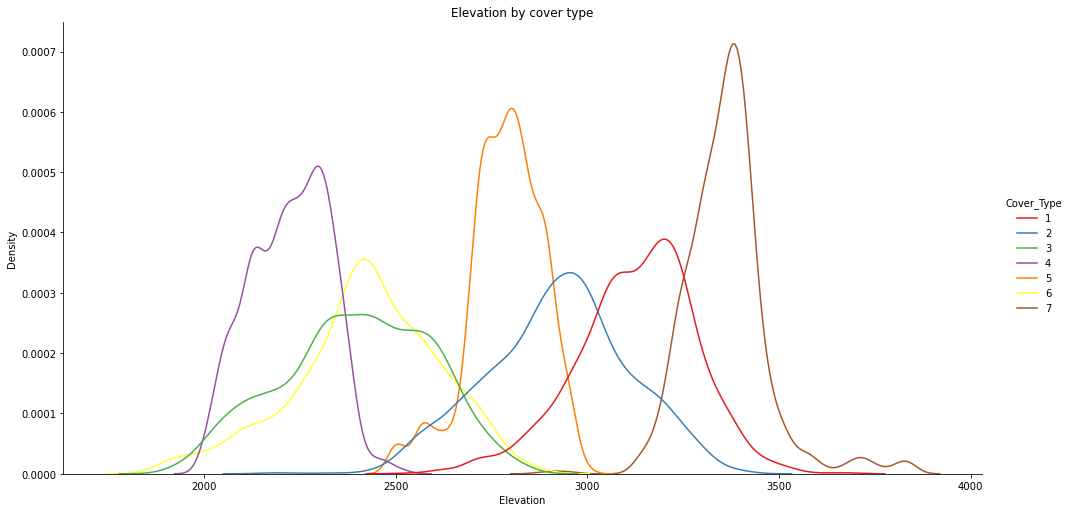

In [202]:
# Plotting distribution of Cover_Types by elevation

# Plotting Kernel Density Plots - not affected by bins used 
sns.displot(data, x="Elevation", 
    kind="kde",
    hue="Cover_Type",  
    palette="Set1", #"Accent or "Dark2"
    height=7, 
    aspect=2, 
    #fill=True,
).set(title = "Elevation by cover type")

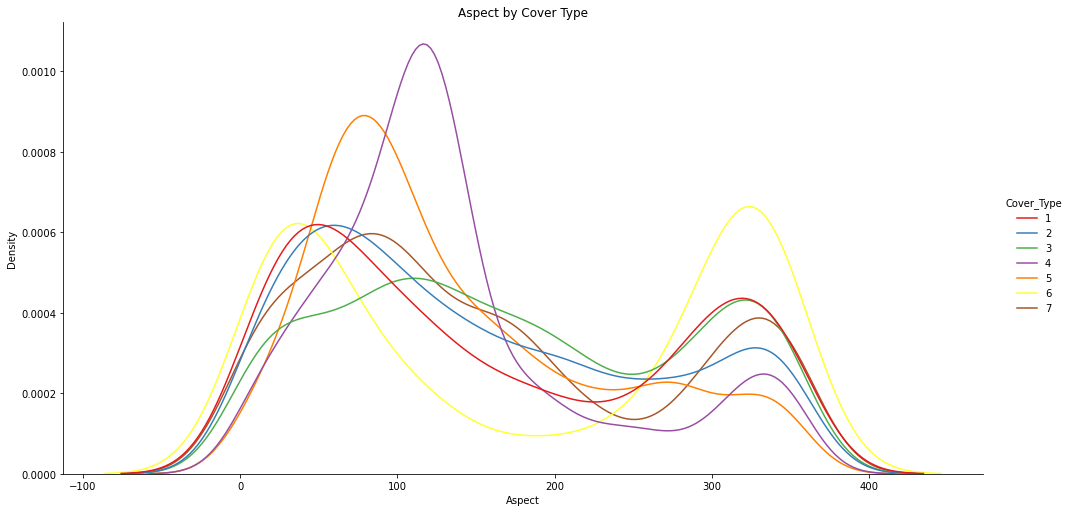

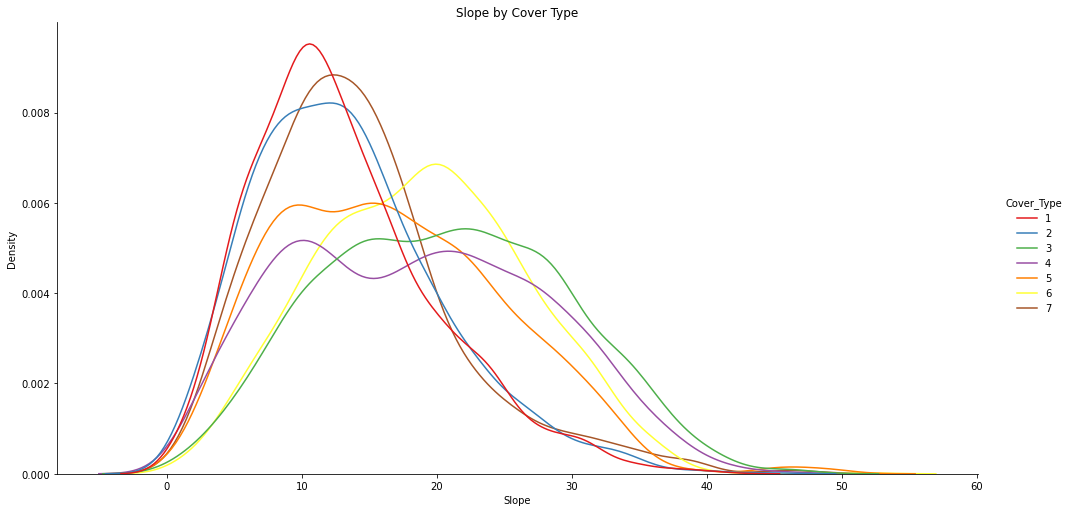

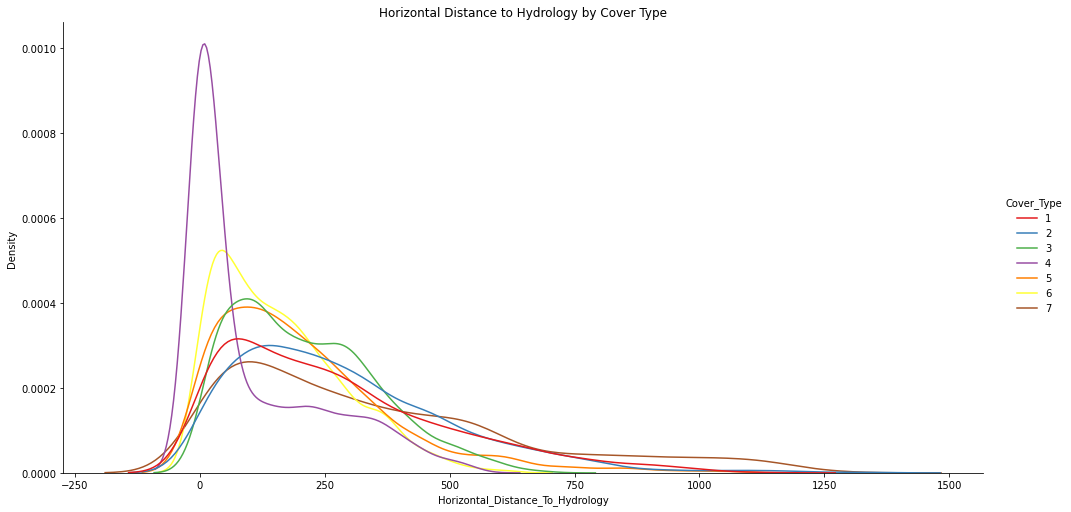

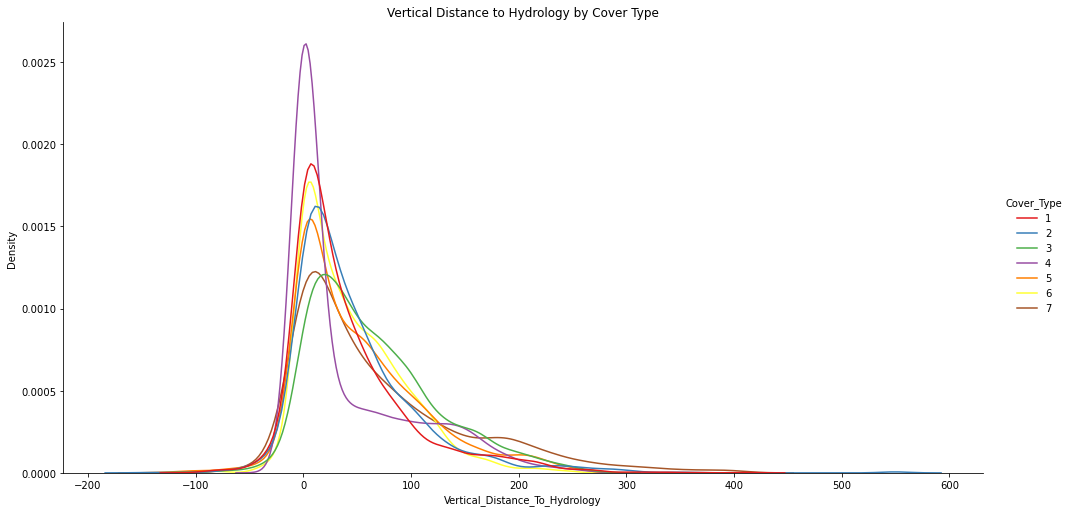

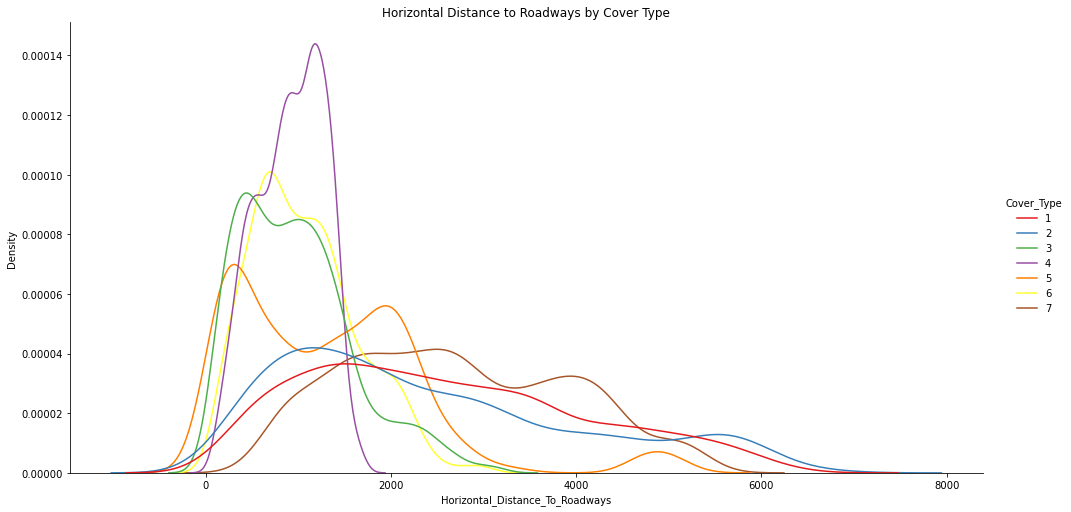

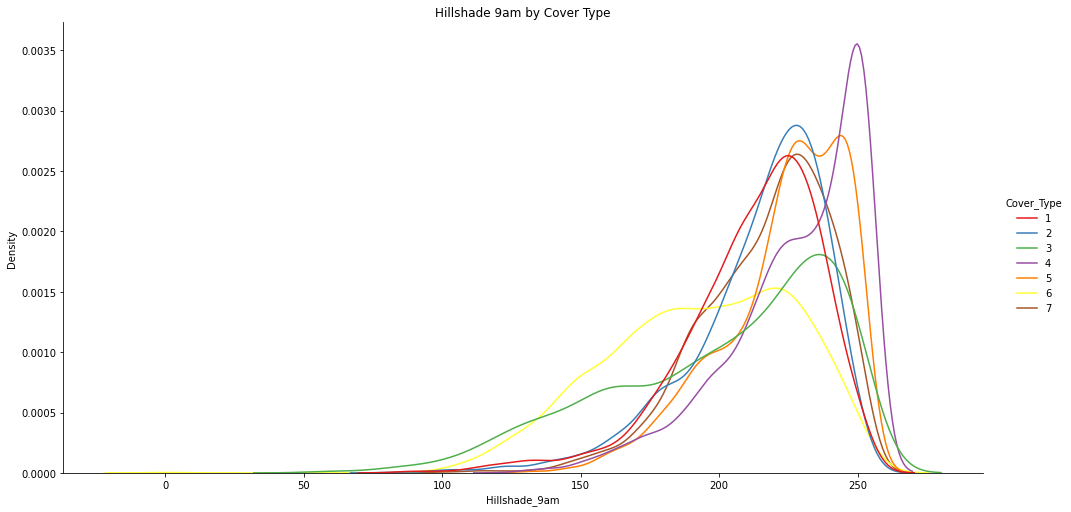

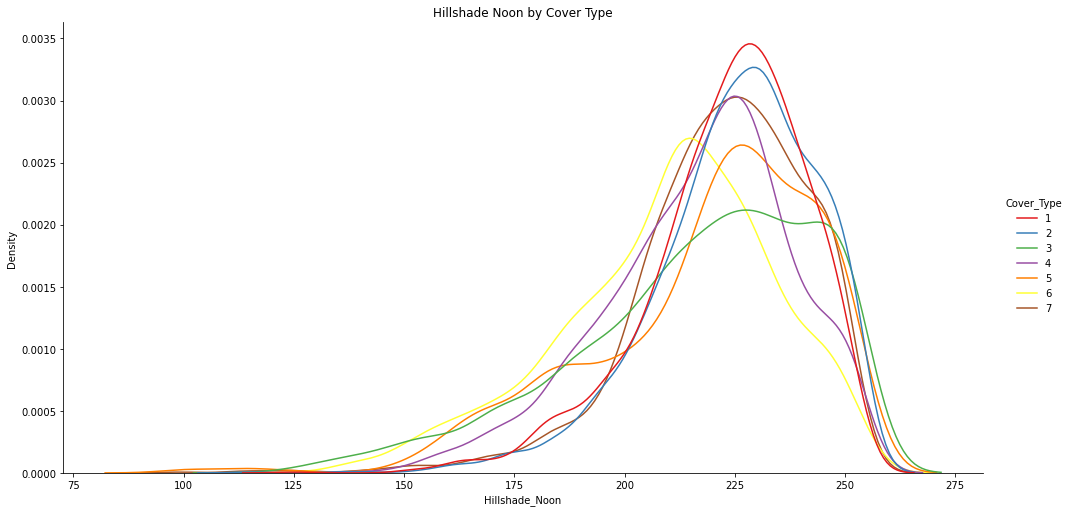

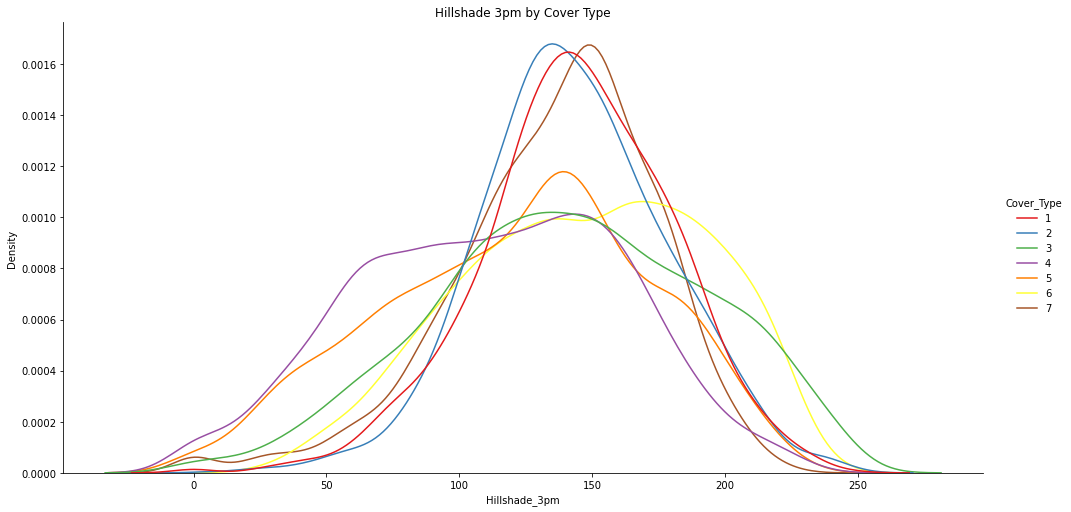

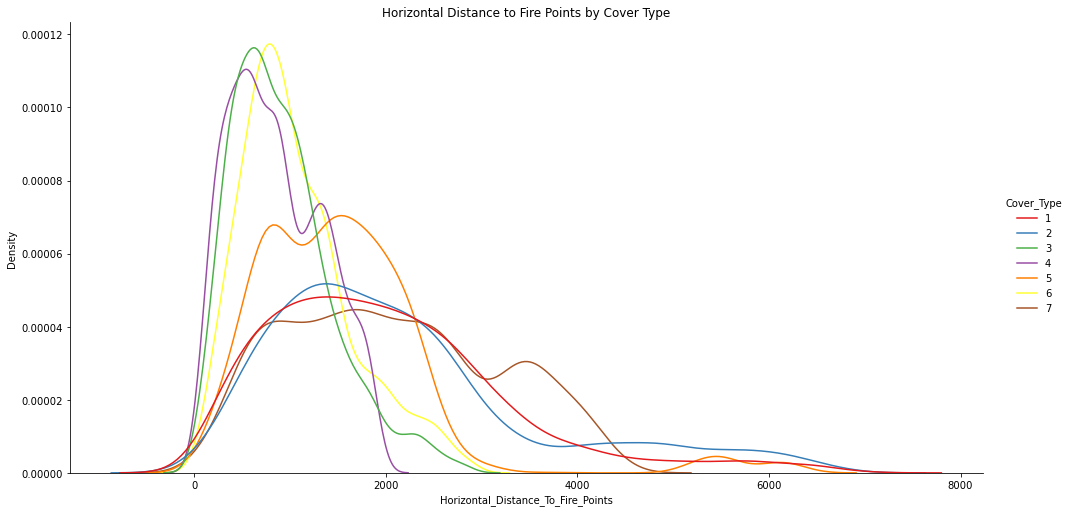

In [203]:
# Plotting distribution of Cover_Types by remaining numerical variables


#Density plots for all other numerical features -> less cover type distinction with these features
#Aspect
sns.displot(data, x="Aspect", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Aspect by Cover Type')

#Slope
sns.displot(data, x="Slope", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Slope by Cover Type')

#Horizontal_Distance_To_Hydrology
sns.displot(data, x="Horizontal_Distance_To_Hydrology", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Horizontal Distance to Hydrology by Cover Type')

#Vertical_Distance_To_Hydrology
sns.displot(data, x="Vertical_Distance_To_Hydrology", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Vertical Distance to Hydrology by Cover Type')

#Horizontal_Distance_To_Roadways
sns.displot(data, x="Horizontal_Distance_To_Roadways", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Horizontal Distance to Roadways by Cover Type')

#Hillshade_9am
sns.displot(data, x="Hillshade_9am", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Hillshade 9am by Cover Type')

#Hillshade_Noon
sns.displot(data, x="Hillshade_Noon", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Hillshade Noon by Cover Type')

#Hillshade_3pm
sns.displot(data, x="Hillshade_3pm", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Hillshade 3pm by Cover Type')

#Horizontal_Distance_To_Fire_Points
sns.displot(data, x="Horizontal_Distance_To_Fire_Points", kind="kde", hue="Cover_Type", palette="Set1", height=7, aspect=2).set(title='Horizontal Distance to Fire Points by Cover Type')

Here, we can clearly see that elevation is a very important feature. For classification, this feature enables us to clearly distinguish between different types of Cover_Types, as they are clustered around different elevation levels. 

From here, we can use our intuition and infer that features who are themselves affected by the elevation, such as slope, aspect, vertical and horizontal based distance, might also have a strong interaction with cover_type. 

<a id='4'></a>
## 4. Baseline Model: Decision Tree Classifier

The goal in this first model is to create a simple model with very few changes to our raw data. This baseline model will serve as a reference point for all subsequent changes we make. By setting a baseline first, we can then see how each of our changes (such as feature creation or algorithm selection) affect the models performance.

Given the high number of features we have, our baseline model will be a `Decision Tree Classifier`. Not only can tree-based models handle a large feature sets with minimal cleaning, but Decision Tree classifier also have an in-built ranking of feature importance. This information will be very important going forward when conducting feature selection to improve our models. 


<a id='4.1'></a>
### 4.1 Defining model evaluation and feature extraction functions

To attain a nuanced understanding of our model evaluation, we will be using the accuracy, precision, recall, F1 scores as well as printing a confusion matrix for our test set predictions. To evaluate whether our model is overfitted, we will also print the accuracy score for a prediction on the train set.

To keep a clean notebook, we are defining the evaluation function and feature importance extractors upfront.

#### Model evaluation function

The inputs are: (1) model or pipeline fitted on the train data, (2) y_train data, and (3) y_test data.<br>
Outputs: (1) Confusion matrix and, (2) dataframe containing model evaluation metrics.

In [205]:
# Defining evaluation function

def evaluation(model_or_pipe, y_train, y_test,model_name):  
    
    #Creating empty list to store model evaluation result 
    model_result = []
    
    # Predict on test data
    y_test_prediction = model_or_pipe.predict(X_test)

    # Predict on train data
    X_test_prediction = model_or_pipe.predict(X_train)
    
    # Evaluating model with classification report and confusion matrix
    acc_test = accuracy_score(y_test, y_test_prediction)
    acc_train = accuracy_score(y_train, X_test_prediction)
    precision = precision_score(y_test, y_test_prediction, average = 'macro')
    recall = recall_score(y_test, y_test_prediction, average = 'macro')
    f1 = f1_score(y_test, y_test_prediction, average = 'macro')
    cm = confusion_matrix(y_test, y_test_prediction) 

    #Storing results in list as key - value pairs
    model_result.append({
    "model": model_name,
    "train_accuracy": acc_train,
    "test_accuracy": acc_test, 
    "precision": precision,
    "recall":recall,
    "f1": f1
    })
    
    # Converting dictionary to dataframe
    accuracy_score_df = pd.DataFrame(model_result).set_index("model")

    
    # Plotting confusion matrix
    cm_df = pd.DataFrame(cm, 
                     index = [0,1,2,3,4,5,6], 
                     columns = [0,1,2,3,4,5,6])
    plt.figure(figsize=(8,8))
    sns.heatmap(cm_df, annot=True, square=True, linewidths=1, cbar_kws={"shrink": .5})
    plt.title(f"{model_name} \n Confusion Matrix", 
          size = 20, 
          pad = 15)
    plt.ylabel("Observed", size = 18, labelpad = 13)
    plt.xlabel("Predicted", size = 18, labelpad = 13)
    plt.show()
    
    # Printing dataframe with model evaluation metrics
    return accuracy_score_df

#### Feature importance function

The inputs are: model or pipeline fitted on the training data <br>
Outputs: dataframe containing features and respective importance score by descending order.

In [206]:
# Defining feature importance function

def feature_importance(model_or_pipe):
    feat_imp = model_or_pipe.feature_importances_
    features = X_train.columns
    feat_imp_dt = pd.DataFrame({
        "feature": features, 
        "importance": feat_imp
    }).sort_values(by="importance", ascending=False).reset_index(drop=True)

    return feat_imp_dt

<a id='4.2'></a>
### 4.2 Running Model

##### Splitting test and training sets

In [207]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [208]:
print(f"X_Train: {X_train.shape}")
print(f"y_Train: {y_train.shape}")
print(f"X_Test: {X_test.shape}")
print(f"y_Test: {y_test.shape}")

X_Train: (12096, 54)
y_Train: (12096,)
X_Test: (3024, 54)
y_Test: (3024,)


##### Building and Fitting Baseline Model

As we want to make no changes to our data, for our baseline model there is not need to pass a pipeline.

In [209]:
#Defining model to use and model name
model_0 = tree.DecisionTreeClassifier(random_state = 42)
model_0_name = "Decision Tree Classifier"

In [210]:
# Fitting model 
model_0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##### Evaluating model

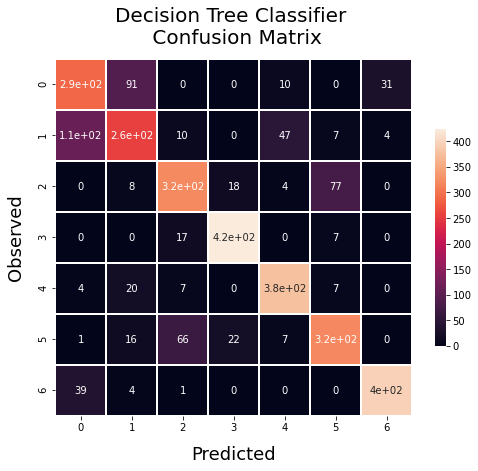

train_accuracy  test_accuracy  precision    recall  \
model                                                                          
Decision Tree Classifier             1.0        0.78869   0.785879  0.788125   

                                f1  
model                               
Decision Tree Classifier  0.786441

In [211]:
# Printing model performance
evaluation(model_0, y_train, y_test, model_0_name)

With a completed baseline model, we see that accuracy on the test set (the most important metric) has a score of 79%, which is not a bad starting point from considering no feature engineering or hyperparameter tuning.

As expected, our Decision Tree has overfitted the training data. Without cross validation or pruning, this is to be expected. Our model currently has high variance and low bias. Later on, we can try Bagging and/or Boosting implementations of tree-based methods to mitigate the overfitting. 

#### Feature importance

In [212]:
# Calculating feature importance
feature_importance1 = feature_importance(model_0)


In [213]:
feature_importance1

feature  importance
0                            Elevation    0.413382
1      Horizontal_Distance_To_Roadways    0.095239
2   Horizontal_Distance_To_Fire_Points    0.081076
3     Horizontal_Distance_To_Hydrology    0.069506
4                        Hillshade_9am    0.059873
5       Vertical_Distance_To_Hydrology    0.038135
6                               Aspect    0.034690
7                       Hillshade_Noon    0.032227
8                        Hillshade_3pm    0.031118
9                                Slope    0.021515
10                          Soil_Type4    0.015728
11                    Wilderness_Area1    0.014429
12                          Soil_Type3    0.013308
13                         Soil_Type10    0.011860
14                         Soil_Type39    0.006679
15                    Wilderness_Area3    0.006363
16                    Wilderness_Area4    0.005170
17                         Soil_Type12    0.005057
18                         Soil_Type32    0.004493
19                         Soil_Type17    0.004148
20                         Soil_Type13    0.003969
21                         Soil_Type29    0.003704
22                          Soil_Type6    0.003596
23                         Soil_Type38    0.003460
24                         Soil_Type35    0.001904
25                         Soil_Type30    0.001830
26                         Soil_Type24    0.001770
27                         Soil_Type22    0.001716
28                         Soil_Type33    0.001713
29                         Soil_Type40    0.001695
30                         Soil_Type23    0.001624
31                          Soil_Type2    0.001560
32                         Soil_Type20    0.001496
33                    Wilderness_Area2    0.001334
34                         Soil_Type11    0.001180
35                         Soil_Type31    0.001070
36                          Soil_Type5    0.000677
37                         Soil_Type16    0.000440
38                          Soil_Type1    0.000359
39                         Soil_Type14    0.000290
40                         Soil_Type26    0.000251
41                         Soil_Type19    0.000188
42                         Soil_Type27    0.000182
43                         Soil_Type28    0.000000
44                         Soil_Type18    0.000000
45                          Soil_Type8    0.000000
46                          Soil_Type7    0.000000
47                         Soil_Type25    0.000000
48                         Soil_Type34    0.000000
49                         Soil_Type15    0.000000
50                         Soil_Type36    0.000000
51                         Soil_Type37    0.000000
52                         Soil_Type21    0.000000
53                          Soil_Type9    0.000000

In [214]:
#Calculating sum of top 10 features ranked by importance

top_10 = feature_importance1.loc[0:10, ["importance"]].sum()

print(f"Sum of top 10 features sorted by importance is : {round(top_10[0],3)}")

Sum of top 10 features sorted by importance is : 0.892


As expected, elevation is the feature with the highest importance, followed by (as expected) the three features with with the highest correlation coefficient with elevation. 

We can also observe that the top 10 most importance features are all the numeric features. The binary features do not score well, with the highest score for Soil_Type4 at 0.015 - which is still very low. We can infer from this that binary features add very little information to our model. 

<a id='5'></a>
## 5. Changing our Model - Features

Now that we have a baseline model. We can improve the performance by trying to create new features, or reduce the number of features to elimnate redundancy in our dataset.

<a id='5.1'></a>
### 5.1 Decision Tree Classifier with Extra Features

The first changes that need to be made in order to improve the model's performance is the creation of new features in order to extract more valuable information from those originally provided. 

Although we already have many features, we see that information gain from 44 binary features is only 10%. Just the 10 numerical features explain 90% of the variance. Creating features from the numerical features might therefore be a good idea. Let's try it out!



Many of the numerical features measure the distance of trees to landmarks in the ecosystem: fire points, hydrology, roadways. Although were are not expert in forestry, perhaps combining these values through average, sums and differences and adding them to our dataset might yield interesting results.


In [215]:
# Mean distances

data['Mean_Amenities'] = (data.loc[:,"Horizontal_Distance_To_Fire_Points"] + 
                            data.loc[:,"Horizontal_Distance_To_Hydrology"]   +
                            data.loc[:,"Horizontal_Distance_To_Roadways"]) / 3

data['Mean_Fire_Hyd'] = (data.loc[:,"Horizontal_Distance_To_Fire_Points"] + 
                            data.loc[:,"Horizontal_Distance_To_Hydrology"]) / 2                      

                            
data['Mean_Elevation_Vertical_Distance_Hydrology'] = (data.loc[:,'Elevation'] 
                                                    + data.loc[:,'Vertical_Distance_To_Hydrology'])/2

                            
data['Mean_Distance_Hydrology_Firepoints'] = (data.loc[:,'Horizontal_Distance_To_Hydrology'] 
                                                 + data.loc[:,'Horizontal_Distance_To_Fire_Points'])/2

                            
data['Mean_Distance_Hydrology_Roadways'] = (data.loc[:,'Horizontal_Distance_To_Hydrology'] 
                                               + data.loc[:,'Horizontal_Distance_To_Roadways'])/2

data['Mean_Distance_Firepoints_Roadways'] = (data.loc[:,'Horizontal_Distance_To_Fire_Points'] 
                                                + data.loc[:,'Horizontal_Distance_To_Roadways'])/2

data['EVDTH'] = data['Elevation'] - data['Vertical_Distance_To_Hydrology']


In [216]:
# Sums and Differences

data['HF1'] = data.loc[:,'Horizontal_Distance_To_Hydrology'] + data.loc[:,'Horizontal_Distance_To_Fire_Points']

data['HF2'] = abs(data['Horizontal_Distance_To_Hydrology'] - data['Horizontal_Distance_To_Fire_Points'])

data['HR1'] = abs(data['Horizontal_Distance_To_Hydrology'] + data['Horizontal_Distance_To_Roadways'])

data['HR2'] = abs(data['Horizontal_Distance_To_Hydrology'] - data['Horizontal_Distance_To_Roadways'])

data['FR1'] = abs(data['Horizontal_Distance_To_Fire_Points'] + data['Horizontal_Distance_To_Roadways'])

data['FR2'] = abs(data['Horizontal_Distance_To_Fire_Points'] - data['Horizontal_Distance_To_Roadways'])


In [217]:
def reverse_encode(relevant_subset):

    num_list =[]
    for i in relevant_subset.iloc:
        ix = 1
        for j in i:
            if j ==1:
                num_list.append(ix)
            else: 
                ix +=1
                
    print('The new list has the following elements: ' + str(set(num_list)))
    if relevant_subset.shape[0] == len(num_list):
        return num_list
    else: print('Error in compiling list: lengths of the two lists do not match.')

In [218]:
wilderness_train = data.loc[:,'Wilderness_Area1':'Wilderness_Area4']

soiltype_train = data.loc[:,'Soil_Type1':'Soil_Type40']

data["wilderness"] = reverse_encode(wilderness_train)

data["soiltypes"] = reverse_encode(soiltype_train)


The new list has the following elements: {1, 2, 3, 4}
The new list has the following elements: {1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}


#### Splitting Data

In [219]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [220]:
print(f"X_Train: {X_train.shape}")
print(f"y_Train: {y_train.shape}")
print(f"X_Test: {X_test.shape}")
print(f"y_Test: {y_test.shape}")

X_Train: (12096, 69)
y_Train: (12096,)
X_Test: (3024, 69)
y_Test: (3024,)


#### Buiding and Fitting model to train data

In [221]:
#Defining model to use and model name
model_1 = tree.DecisionTreeClassifier(random_state = 42)
model_1_name = "Decision Tree Classifier with New Features"

In [222]:
# Fitting model 
model_1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Evaluating Model

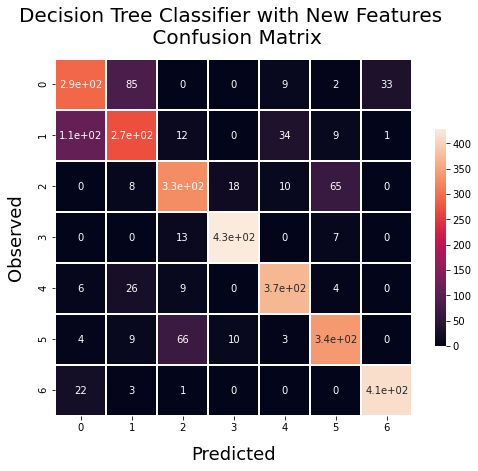

train_accuracy  test_accuracy  \
model                                                                       
Decision Tree Classifier with New Features             1.0        0.80787   

                                            precision    recall        f1  
model                                                                      
Decision Tree Classifier with New Features   0.805001  0.807039  0.805764

In [223]:
# Printing model performance
evaluation(model_1, y_train, y_test,model_1_name )

In [224]:
# Calculating feature importance
feature_importance2 = feature_importance(model_1)


In [225]:
feature_importance2.iloc[0:15,:]

feature  importance
0                                        EVDTH    0.206246
1                                    soiltypes    0.138637
2                                    Elevation    0.135147
3                                Hillshade_9am    0.049440
4             Horizontal_Distance_To_Hydrology    0.040415
5            Mean_Distance_Firepoints_Roadways    0.036462
6                                          FR2    0.035252
7                                          HR2    0.031729
8                                          HF2    0.026677
9                                Hillshade_3pm    0.022628
10                                      Aspect    0.022442
11                              Mean_Amenities    0.021865
12  Mean_Elevation_Vertical_Distance_Hydrology    0.019603
13                              Hillshade_Noon    0.019256
14             Horizontal_Distance_To_Roadways    0.017474

In [226]:
#Calculating sum of top 10 features ranked by importance

top_10 = feature_importance2.loc[0:10, ["importance"]].sum()

print(f"Sum of top 10 features sorted by importance is : {round(top_10[0],3)}")

Sum of top 10 features sorted by importance is : 0.745


After adding new featues to our baseline DecisionTree, we see that accuracy has improved by 3% to 81%. 

We can also see that the top 10 features no explain only 72% of the data against the previous 90% without new features. Of the new features created, EVDTH, soiltypes mean distance_firepoints_roadways, FR2, HR2 and HF2 have made it into the top 10. 

This might indicate that the new features we have created are simply highly correlated to the pre-existing numerical features. Although we have increased our accuracy, perhaps we may have introduced redundancy to our dataset. We can check this by plotting a heatmap correlation matrix of our new features.


#### Correlation matrix of previous and newly created numerical features

In [227]:
# Creating dataframe with only numerical features
data_numeric_extra = data.drop(columns = data_binary.columns)

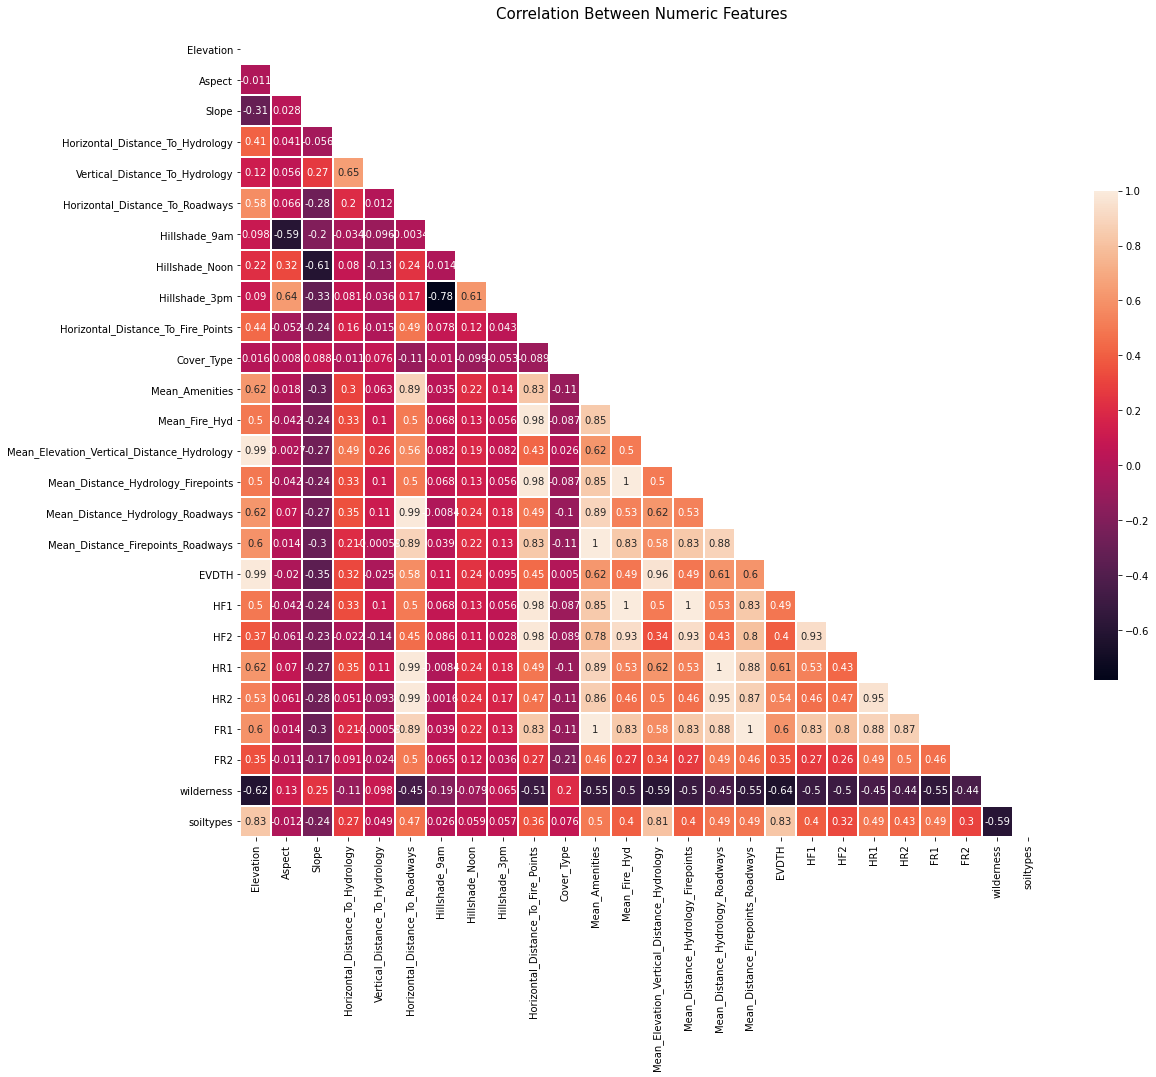

In [228]:
# Plotting correlation of numerical features as a heatmap

# Getting correlation values for numerical features
corr = data_numeric_extra.corr()

# Plotting correlations as a heatmap
fig, ax = plt.subplots(figsize=(18,18))


# Generating a mask so that the only one half of the square has values
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
graph = sns.heatmap(corr, annot=True, mask = mask, 
                    square=True, linewidths=1, cbar_kws={"shrink": .5})

# Adding title to figure
graph.set_title("Correlation Between Numeric Features", fontsize = 15, pad = 15)
plt.show()

From a quick viewing, we can see that we the correlation matrix has many highly and perfectly correlated variables. Therefore the consquence of adding more features has been to add redundancy to our dataset. 

Given these new features, we can try a feature selection technique - PCA and see what impact this has on our model. 

<a id='5.2'></a>
### 5.2 Decision Tree Classifier with Feature Selection

Adding features did not add too much to our accuracy. Given that we have 54 predictors, we could also try a feature selection technique, such as PCA on the numerical variables. Although this is typically done when the ratio of a dataset's dimensions is large compared to the number of observations, it pays to try new techniques.

In doing so we can reduce redundancy in of our numerical features by createing linear combinations. We can then select those linear combinations based on the % of the variance in the dataset they capture. 

Before implementing PCA, however, we must be sure that our numerical features (1) don not contain outliers, (2) are scaled and, (3) are symmetric.

##### Splitting data into training and test sets

In [229]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

##### Outlier handling on x_train set

In [230]:
X_train_numerical = X_train.drop(columns = data_binary.columns)

X_train_binary = X_train.drop(columns = X_train_numerical.columns)


In [231]:
### IQR Outlier Capping Method:

outlier_df = X_train_numerical.describe()

def outlier_function_name(df, col_name):
    first_quartile = outlier_df[col_name][4]
    third_quartile = outlier_df[col_name][6]
    IQR = third_quartile - first_quartile
    upper_limit = third_quartile+(1.5*IQR)
    lower_limit = first_quartile-(1.5*IQR)
    
    #Counting
    outlier_count = len(df[(df[col_name]>upper_limit) | (df[col_name]<lower_limit)])
    return lower_limit, upper_limit, outlier_count

In [232]:
numeric = list(X_train_numerical.columns)
dic_outliers = {}
for column in numeric:
        print("There are {} outliers in {}".format(outlier_function_name(X_train_numerical, column)[2], column))
        dic_outliers[column] = outlier_function_name(X_train_numerical, column)[:2]

There are 0 outliers in Elevation
There are 0 outliers in Aspect
There are 42 outliers in Slope
There are 410 outliers in Horizontal_Distance_To_Hydrology
There are 422 outliers in Vertical_Distance_To_Hydrology
There are 668 outliers in Horizontal_Distance_To_Roadways
There are 330 outliers in Hillshade_9am
There are 321 outliers in Hillshade_Noon
There are 97 outliers in Hillshade_3pm
There are 516 outliers in Horizontal_Distance_To_Fire_Points
There are 440 outliers in Mean_Amenities
There are 407 outliers in Mean_Fire_Hyd
There are 9 outliers in Mean_Elevation_Vertical_Distance_Hydrology
There are 407 outliers in Mean_Distance_Hydrology_Firepoints
There are 607 outliers in Mean_Distance_Hydrology_Roadways
There are 548 outliers in Mean_Distance_Firepoints_Roadways
There are 0 outliers in EVDTH
There are 407 outliers in HF1
There are 563 outliers in HF2
There are 607 outliers in HR1
There are 636 outliers in HR2
There are 548 outliers in FR1
There are 647 outliers in FR2
There are 0

In [233]:
action = "clip" #choose between clip, drop or nothing
for cols,limits in dic_outliers.items():
    if action == 'drop':
        data = X_train_numerical[(X_train_numerical[cols]<=limits[1]) & (X_train_numerical[cols]>=limits[0])].reset_index()
        data = X_train_numerical.drop(columns = ['index'])
    elif action == 'clip':
        X_train_numerical.loc[X_train_numerical[cols]>limits[1],cols] = limits[1]
        X_train_numerical.loc[X_train_numerical[cols]<limits[0],cols] = limits[0]

In [234]:
numeric = list(X_train_numerical.columns)
dic_outliers = {}
for column in numeric:
        print("There are {} outliers in {}".format(outlier_function_name(X_train_numerical, column)[2], column))
        dic_outliers[column] = outlier_function_name(X_train_numerical, column)[:2]

There are 0 outliers in Elevation
There are 0 outliers in Aspect
There are 0 outliers in Slope
There are 0 outliers in Horizontal_Distance_To_Hydrology
There are 0 outliers in Vertical_Distance_To_Hydrology
There are 0 outliers in Horizontal_Distance_To_Roadways
There are 0 outliers in Hillshade_9am
There are 0 outliers in Hillshade_Noon
There are 0 outliers in Hillshade_3pm
There are 0 outliers in Horizontal_Distance_To_Fire_Points
There are 0 outliers in Mean_Amenities
There are 0 outliers in Mean_Fire_Hyd
There are 0 outliers in Mean_Elevation_Vertical_Distance_Hydrology
There are 0 outliers in Mean_Distance_Hydrology_Firepoints
There are 0 outliers in Mean_Distance_Hydrology_Roadways
There are 0 outliers in Mean_Distance_Firepoints_Roadways
There are 0 outliers in EVDTH
There are 0 outliers in HF1
There are 0 outliers in HF2
There are 0 outliers in HR1
There are 0 outliers in HR2
There are 0 outliers in FR1
There are 0 outliers in FR2
There are 0 outliers in wilderness
There are 0 

In [235]:
X_train_numerical.shape

(12096, 25)

##### Outlier handling on X_test set

In [236]:
X_test_numerical = X_test.drop(columns = data_binary.columns)

X_test_binary = X_test.drop(columns = X_test_numerical.columns)


In [237]:
X_test_numerical.shape

(3024, 25)

In [238]:
X_test_binary.shape

(3024, 44)

In [239]:
### IQR Outlier Capping Method:

outlier_df = X_test_numerical.describe()

def outlier_function_name(df, col_name):
    first_quartile = outlier_df[col_name][4]
    third_quartile = outlier_df[col_name][6]
    IQR = third_quartile - first_quartile
    upper_limit = third_quartile+(1.5*IQR)
    lower_limit = first_quartile-(1.5*IQR)
    
    #Counting
    outlier_count = len(df[(df[col_name]>upper_limit) | (df[col_name]<lower_limit)])
    return lower_limit, upper_limit, outlier_count

In [240]:
numeric = list(X_test_numerical.columns)
dic_outliers = {}
for column in numeric:
        print("There are {} outliers in {}".format(outlier_function_name(X_test_numerical, column)[2], column))
        dic_outliers[column] = outlier_function_name(X_test_numerical, column)[:2]

There are 0 outliers in Elevation
There are 0 outliers in Aspect
There are 15 outliers in Slope
There are 116 outliers in Horizontal_Distance_To_Hydrology
There are 151 outliers in Vertical_Distance_To_Hydrology
There are 160 outliers in Horizontal_Distance_To_Roadways
There are 68 outliers in Hillshade_9am
There are 72 outliers in Hillshade_Noon
There are 33 outliers in Hillshade_3pm
There are 130 outliers in Horizontal_Distance_To_Fire_Points
There are 104 outliers in Mean_Amenities
There are 108 outliers in Mean_Fire_Hyd
There are 0 outliers in Mean_Elevation_Vertical_Distance_Hydrology
There are 108 outliers in Mean_Distance_Hydrology_Firepoints
There are 152 outliers in Mean_Distance_Hydrology_Roadways
There are 154 outliers in Mean_Distance_Firepoints_Roadways
There are 0 outliers in EVDTH
There are 108 outliers in HF1
There are 148 outliers in HF2
There are 152 outliers in HR1
There are 147 outliers in HR2
There are 154 outliers in FR1
There are 152 outliers in FR2
There are 0 o

In [241]:
action = "clip" #choose between clip, drop or nothing
for cols,limits in dic_outliers.items():
    if action == 'drop':
        data = X_test_numerical[(X_test_numerical[cols]<=limits[1]) & (X_test_numerical[cols]>=limits[0])].reset_index()
        data = X_test_numerical.drop(columns = ['index'])
    elif action == 'clip':
        X_test_numerical.loc[X_test_numerical[cols]>limits[1],cols] = limits[1]
        X_test_numerical.loc[X_test_numerical[cols]<limits[0],cols] = limits[0]

In [242]:
numeric = list(X_test_numerical.columns)
dic_outliers = {}
for column in numeric:
        print("There are {} outliers in {}".format(outlier_function_name(X_test_numerical, column)[2], column))
        dic_outliers[column] = outlier_function_name(X_test_numerical, column)[:2]

There are 0 outliers in Elevation
There are 0 outliers in Aspect
There are 0 outliers in Slope
There are 0 outliers in Horizontal_Distance_To_Hydrology
There are 0 outliers in Vertical_Distance_To_Hydrology
There are 0 outliers in Horizontal_Distance_To_Roadways
There are 0 outliers in Hillshade_9am
There are 0 outliers in Hillshade_Noon
There are 0 outliers in Hillshade_3pm
There are 0 outliers in Horizontal_Distance_To_Fire_Points
There are 0 outliers in Mean_Amenities
There are 0 outliers in Mean_Fire_Hyd
There are 0 outliers in Mean_Elevation_Vertical_Distance_Hydrology
There are 0 outliers in Mean_Distance_Hydrology_Firepoints
There are 0 outliers in Mean_Distance_Hydrology_Roadways
There are 0 outliers in Mean_Distance_Firepoints_Roadways
There are 0 outliers in EVDTH
There are 0 outliers in HF1
There are 0 outliers in HF2
There are 0 outliers in HR1
There are 0 outliers in HR2
There are 0 outliers in FR1
There are 0 outliers in FR2
There are 0 outliers in wilderness
There are 0 

In [243]:
# Passing new Index
X_test_numerical["index"] = range(1, 1 + len(X_test_numerical))
X_test_binary["index"] = range(1, 1 + len(X_test_binary))

X_test_numerical.set_index("index", inplace = True)
X_test_binary.set_index("index", inplace = True)

X_test_numerical.index == X_test_binary.index

array([ True,  True,  True, ...,  True,  True,  True])

In [244]:
X_test_remerged = X_test_numerical.merge(X_test_binary, left_index=True, right_index = True)
X_test_remerged.shape

(3024, 69)

##### Creating pipeline to scale and limit skewness on numerical features

In [245]:
# Defining pipeline with column transformations 
pipeline = Pipeline([
    ("scaler", RobustScaler()),
    ("power transformer", PowerTransformer()),
])

# Fitting pipeline to x_train numerical features
x_train_scaled = pipeline.fit_transform(X_train_numerical)

x_train_scaled_data = pd.DataFrame(x_train_scaled, columns = X_train_numerical.columns)

# Passing new Index
x_train_scaled_data["index"] = range(1, 1 + len(x_train_scaled_data))
X_train_binary["index"] = range(1, 1 + len(X_train_binary))

x_train_scaled_data.set_index("index", inplace = True)
X_train_binary.set_index("index", inplace = True)

x_train_scaled_data.index == X_train_binary.index

array([ True,  True,  True, ...,  True,  True,  True])

In [246]:
X_train_remerged = x_train_scaled_data.merge(X_train_binary, left_index=True, right_index = True)


In [247]:
X_train_remerged.isna().mean()

Elevation                           0.0
Aspect                              0.0
Slope                               0.0
Horizontal_Distance_To_Hydrology    0.0
Vertical_Distance_To_Hydrology      0.0
                                   ... 
Soil_Type36                         0.0
Soil_Type37                         0.0
Soil_Type38                         0.0
Soil_Type39                         0.0
Soil_Type40                         0.0
Length: 69, dtype: float64

##### Creating and fitting PCA and Decision Tree Pipeline

In [248]:
pca = PCA()

In [249]:
# Defining pipeline with pca and Decision Tree Classifier
pca_pipeline = Pipeline([
    ("pca", pca),
    ("model", tree.DecisionTreeClassifier()),
])

In [250]:
# fit pipeline
pca.fit_transform(x_train_scaled_data)

model_2_name = "Decision Tree Classifier with PCA"

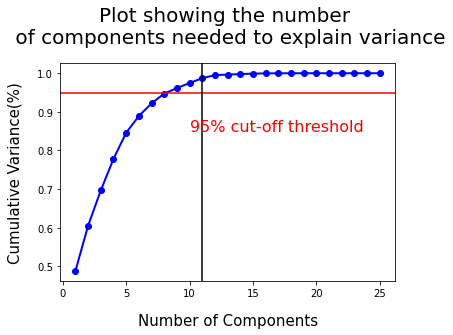

In [251]:
#Plotting cumulative variance
cumsum = np.cumsum(pca.explained_variance_ratio_)


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, cumsum, 'o-', linewidth=2, color='blue')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(10, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
plt.axvline(x = 11, color='black', linestyle='-')
plt.title('Plot showing the number \n of components needed to explain variance', fontsize = 20, pad = 20)
plt.xlabel('Number of Components', fontsize = 15, labelpad = 15)
plt.ylabel("Cumulative Variance(%)", fontsize = 15, labelpad = 15)
plt.show()

In [252]:
pca = PCA(n_components = 10)

In [253]:
# Defining pipeline with pca and Decision Tree Classifier
pca_pipeline = Pipeline([
    ("pca", pca),
    ("model", tree.DecisionTreeClassifier()),
])

##### Fitting Pipeline

In [254]:
# fit pipeline
pca_pipeline.fit(x_train_scaled_data, y_train)

model_2_name = "Decision Tree Classifier with PCA"

##### Evaluating Model

In [255]:
evaluation(pca_pipeline, y_train, X_test_numerical, model_2_name)

ValueError: X has 69 features, but PCA is expecting 25 features as input.

Our model's performance increased "......." after using the new features and then selecting features. We are clearly on the right track, so we can move on to the next step in our process and start testing different algorithms with our data.

<a id='6'></a>
## 6. Changing our Model - Algorithm

Decision Tree Classifier is a simple implementation of tree-based methods. Now we want to try some more complex algorithms. Secifically, RandomForest and ExtraTree Classifiers.

<a id='6.1'></a>
### 6.1 Random Forest Classifier with Extra Features

Random Forest Classifier is a more sophisticated implementation of Decision Trees that uses Bagging. Bagging invovled creating many Decision Trees using sub-samples of the training data (with replacement), and then averaging the model to optimize variance and bias.

Without any pruning, Bagging results in models that can generalize better than a single decision tree. 

#### Splitting train and test data

In [256]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [257]:
print(f"X_Train: {X_train.shape}")
print(f"y_Train: {y_train.shape}")
print(f"X_Test: {X_test.shape}")
print(f"y_Test: {y_test.shape}")

X_Train: (12096, 69)
y_Train: (12096,)
X_Test: (3024, 69)
y_Test: (3024,)


#### Buiding and Fitting model to train data

In [258]:
#Defining model to use and model name
model_2 = RandomForestClassifier(random_state = 42)
model_2_name = "Random Forest Classifier with New Features"

In [259]:
# Fitting model 
model_2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Evaluating Model

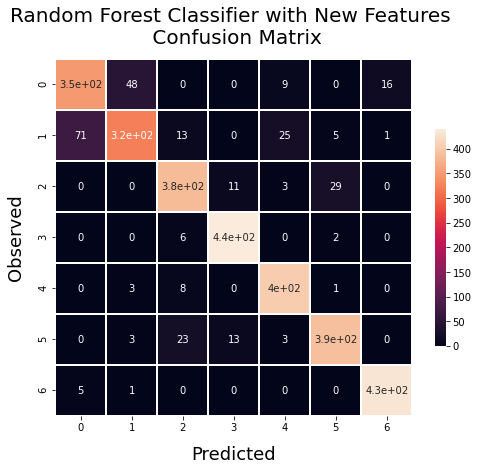

train_accuracy  test_accuracy  \
model                                                                       
Random Forest Classifier with New Features             1.0       0.901124   

                                            precision    recall        f1  
model                                                                      
Random Forest Classifier with New Features    0.89918  0.900865  0.899188

In [260]:
# Printing model performance
evaluation(model_2, y_train, y_test, model_2_name)

The Random Forest Classifier performs significantly better than the Decision Tree Classifier. Trained on the datase with exdtra features, the model accuracy jumped by approximately from 81% to 89%. 

<a id='6.2'></a>
### 6.2 Gradient Boosted Classifier with Extra Features

Gradient Boosting is a more sophisticated implementation of Decision Trees that uses Boosting. Unlike the Random Forest classifier that trains many trees in parallel and combines the results, Boosting is more sophisticated. The trees are built sequentially, with each new tree created to minimize the prediction error of the previous tree. Performance is evaluated along the way resulting in a optimized calculation.

#### Splitting train and test data

In [261]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

##### Buiding and Fitting model to train data

In [262]:
#Defining model to use and model name
model_3 = GradientBoostingClassifier(random_state = 42)
model_3_name = "Gradient Boosting Classifier with New Features"

In [263]:
# Fitting model 
model_3.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

#### Evaluating Model

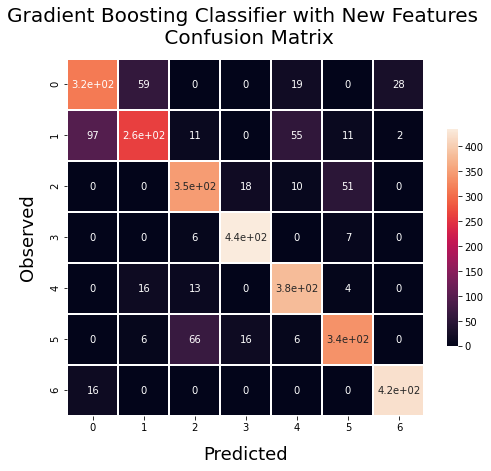

train_accuracy  test_accuracy  \
model                                                                           
Gradient Boosting Classifier with New Features        0.869461       0.829034   

                                                precision    recall        f1  
model                                                                          
Gradient Boosting Classifier with New Features   0.825398  0.828511  0.824781

In [264]:
# Printing model performance
evaluation(model_3, y_train, y_test, model_3_name)

The performance of the Gradient Boosting model was not an improveent over our Random Forest. Improving the model accuracy by a single percentage point. Due to the nature of how Gradient Boosting is calculated it requires some degree of hyperparameter tuning to truly be effective. 

<a id='6.3'></a>
### 6.3 Extra Trees Classifier (Extrememely Randomized Trees) with Extra Features

Extra Trees Classifier follows a similar implementation to Random Forest with two key differences. First, unless specified, it does not boostrap, therefore it samples randomly without replacement. Second, nodes are split randomly, rather than on the best splits, i.e. independent of the labels of the train set.

Another consideration is that Extra Trees are computationally faster than Random Forest Classifiers.

#### Splitting train and test data

In [265]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

#### Buiding and Fitting model to train data

In [266]:
#Defining model to use and model name
model_4 = ExtraTreesClassifier(random_state = 42)
model_4_name = "Extra Trees Classifier with New Features"

In [267]:
# Fitting model 
model_4.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

#### Evaluating Model

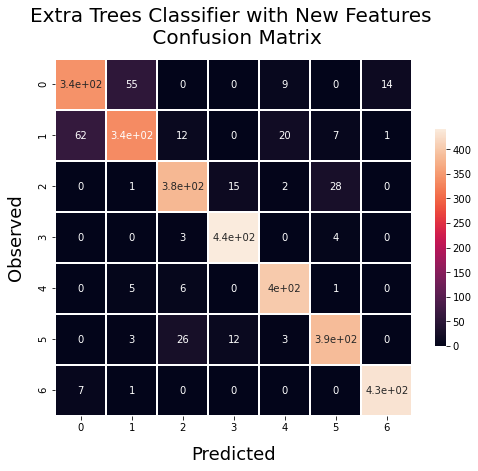

train_accuracy  test_accuracy  \
model                                                                     
Extra Trees Classifier with New Features             1.0       0.901786   

                                          precision    recall        f1  
model                                                                    
Extra Trees Classifier with New Features   0.899809  0.901415  0.900208

In [268]:
# Printing model performance
evaluation(model_4, y_train, y_test, model_4_name)

The Extra Trees Classifier performs significantly better than the Decision Tree Classifier, and best among the more sophisticated implementation of tree based algorithms. Trained on the datase with extra features, the model accuracy is 90%. 

This leads us to the next step in our proccess, where we will perform hyperparameter tuning on both the Random Forest Model and the Extra Trees model in order to fine-tune each of them. Since both achieved similar accuracy scores, it makes sense to tune both of them. Given their slight differnce in implementation, one might perform better than the other given the dataset.

Furthermore, by tuning the models, we can begin dealing with the problem of being overvitted.

<a id='7'></a>
## 7. Changing our Model - Hyperparameter Tuning

The best performing models were Random Forest and Extra Trees classifier with extra features generated. We can now pass on to the next phase and tune the hyperparameters of these models. 

Lastly, we can pass the tuned hyperparameters to a voting classifier to combine the results of the best models.

<a id='7.1'></a>
### 7.1 Random Forest GridSearch CV

##### Splitting data for training and test set

In [269]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

##### Defining Parameter Grid to iterate through

In [270]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(500, 800, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 200, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

##### Fitting grid search to train data

In [271]:
grid_search = GridSearchCV(
                        RandomForestClassifier(random_state=42), 
                        random_grid, 
                        cv = 2, 
                        n_jobs = -1,
                        verbose = 2)


start = time.time()
# fit pipeline
grid_search.fit(X_train, y_train)

stop = time.time()
print(f"Training time: {stop - start}s")

Fitting 2 folds for each of 1080 candidates, totalling 2160 fits


KeyboardInterrupt: 

Passing a rather large hyperparamter grid took 9 hours to process. A tad bit time consuming. 
By fishing out the optimal parameters and passing them to a RandomForest classifier, we can evaluate if this tuning was worth the time.


In [272]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
# Optimal parameters
rfbest_bootstrap = False
rfbest_max_depth = 50
rfbest_max_features = "auto"
rfbest_min_samples_leaf = 1
rfbest_min_samples_split = 2
rfbest_n_estimators = 752

##### Buiding and Fitting model to train data

In [ ]:
#Defining model to use and model name
model_5 = RandomForestClassifier(random_state = 42,
                                 n_estimators = rfbest_n_estimators,
                                 max_depth = rfbest_max_depth,
                                 min_samples_split = rfbest_min_samples_split,
                                 min_samples_leaf = rfbest_min_samples_leaf,
                                 max_features = rfbest_max_features,
                                 bootstrap = rfbest_bootstrap)


model_5_name = "Tuned Random Forest Classifier with New Features"

In [ ]:
# Fitting model 
model_5.fit(X_train, y_train)

##### Evaluating model

In [ ]:
# Printing model performance
evaluation(model_5, y_train, y_test, model_5_name)

Accuracy only improved by 1% from our previous un-tuned RandomForest Classifier. Although this is a welcome improvement, it may have not been worth the 9 hours. For our next models, we can try a RandomSearchCV.

The benefits of a random search cv versus a grid search cv comes down to resource use. A random search iterates through the hyperparameter combinations by identifying a direction that works and evaluating hyperparameters that maintain this direction. Therefore, we can pass a large parameter grid, and iterate more quickly through it than with a GridSearch. 

<a id='7.2'></a>
### 7.2 Extra Trees Classifier - Random Search CV

##### Splitting data for training and test set

In [ ]:
# Defining target and predictors
target = data.Cover_Type
df = data.drop('Cover_Type', axis=1)

X, y = df, target

# separate train and test data
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

##### Defining Parameter Grid to iterate through

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(500, 800, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 200, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

##### Fitting Random search to train data

In [ ]:
rnd_search = RandomizedSearchCV(
                        ExtraTreesClassifier(random_state=42), 
                        random_grid, 
                        cv = 2, 
                        n_jobs = -1,
                        verbose = 2)


start = time.time()
# fit pipeline
rnd_search.fit(X_train, y_train)

stop = time.time()
print(f"Training time: {stop - start}s")

The improvement in processing time is astounding. In just over 1 minute we have iterated over the parameter grid to find an optimal model. We can now investigate what impact this has had on model performance.

In [273]:
rnd_search.best_params_

{'n_estimators': 650,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 87,
 'bootstrap': False}

In [274]:
# Optimal parameters
etbest_bootstrap = False
etbest_max_depth = 50
etbest_max_features = "sqrt"
etbest_min_samples_leaf = 1
etbest_min_samples_split = 2
etbest_n_estimators = 575

##### Buiding and Fitting model to train data

In [275]:
#Defining model to use and model name
model_6 = ExtraTreesClassifier(random_state = 42,
                                 n_estimators = etbest_n_estimators,
                                 max_depth = etbest_max_depth,
                                 min_samples_split = etbest_min_samples_split,
                                 min_samples_leaf = etbest_min_samples_leaf,
                                 max_features = etbest_max_features,
                                 bootstrap = etbest_bootstrap)


model_6_name = "Tuned Extra Trees Classifier with New Features"

In [276]:
# Fitting model 
model_6.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=50, max_features='sqrt', n_estimators=575,
                     random_state=42)

##### Evaluating Model

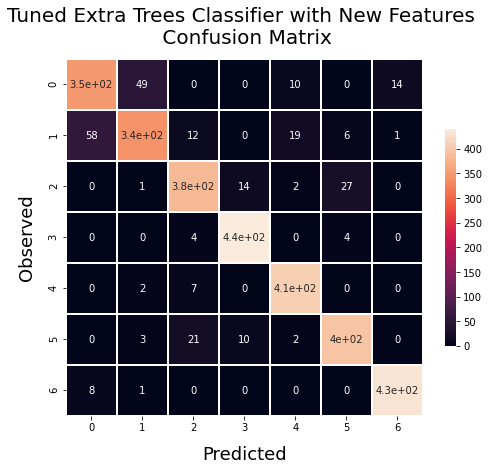

train_accuracy  test_accuracy  \
model                                                                           
Tuned Extra Trees Classifier with New Features             1.0       0.909061   

                                                precision    recall        f1  
model                                                                          
Tuned Extra Trees Classifier with New Features    0.90734  0.908769  0.907622

In [277]:
# Printing model performance
evaluation(model_6, y_train, y_test, model_6_name)

The improvement in model performance is insignificant, rising only by 0.06% with a RandomSearch. 


<a id='8'></a>
# 8. Final Model - Voting Classifier

We have two models with impressive test accuracies (90%) trained on the same data with extra features: (1) Random Forest Classifier tuned with a gridsearch, and (2) Extra trees Classifier tuned with a random search.

Combining these two is a prudent next step. By combining the results of the two models we are able to leverage thier different approaches and cancel out their respective drawbacks. 

We can combine our models using a Voting Classifier. This allows us to impute both of our trained models and average their predictions to output a final result that reflects both of their calculations. 

In [278]:
# Saving Random Forest (Model_5) and Extra Trees (Model_6) to new variables
model_1 = model_5
model_2 = model_6

# Training Classifiers
voting = VotingClassifier(estimators=[('Rf', model_1), ('rf', model_2)], n_jobs = -1)

voting_name = "Voting Classifier with RF & ET"

In [279]:
voting_classifier = voting.fit(X_train, y_train)

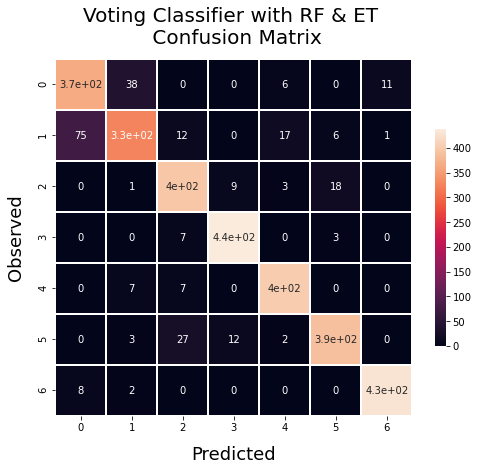

train_accuracy  test_accuracy  precision  \
model                                                                      
Voting Classifier with RF & ET             1.0       0.909061   0.908495   

                                recall        f1  
model                                             
Voting Classifier with RF & ET   0.909  0.907809

In [280]:
evaluation(voting_classifier, y_train, y_test, voting_name)

The Voting Classifier has not improved the model accuracy beyond what the Extra Trees Classifier was already able to achieve.

##### Conducting Feature Creation on Tester dataset

In [281]:
# Mean distances

tester['Mean_Amenities'] = (tester.loc[:,"Horizontal_Distance_To_Fire_Points"] + 
                            tester.loc[:,"Horizontal_Distance_To_Hydrology"]   +
                            tester.loc[:,"Horizontal_Distance_To_Roadways"]) / 3

tester['Mean_Fire_Hyd'] = (tester.loc[:,"Horizontal_Distance_To_Fire_Points"] + 
                            tester.loc[:,"Horizontal_Distance_To_Hydrology"]) / 2                      

                            
tester['Mean_Elevation_Vertical_Distance_Hydrology'] = (tester.loc[:,'Elevation'] 
                                                    + tester.loc[:,'Vertical_Distance_To_Hydrology'])/2

                            
tester['Mean_Distance_Hydrology_Firepoints'] = (tester.loc[:,'Horizontal_Distance_To_Hydrology'] 
                                                 + tester.loc[:,'Horizontal_Distance_To_Fire_Points'])/2

                            
tester['Mean_Distance_Hydrology_Roadways'] = (tester.loc[:,'Horizontal_Distance_To_Hydrology'] 
                                               + tester.loc[:,'Horizontal_Distance_To_Roadways'])/2

tester['Mean_Distance_Firepoints_Roadways'] = (tester.loc[:,'Horizontal_Distance_To_Fire_Points'] 
                                                + tester.loc[:,'Horizontal_Distance_To_Roadways'])/2

tester['EVDTH'] = tester['Elevation'] - tester['Vertical_Distance_To_Hydrology']


In [282]:
# Sums and Differences

tester['HF1'] = tester.loc[:,'Horizontal_Distance_To_Hydrology'] + tester.loc[:,'Horizontal_Distance_To_Fire_Points']

tester['HF2'] = abs(tester['Horizontal_Distance_To_Hydrology'] - tester['Horizontal_Distance_To_Fire_Points'])

tester['HR1'] = abs(tester['Horizontal_Distance_To_Hydrology'] + tester['Horizontal_Distance_To_Roadways'])

tester['HR2'] = abs(tester['Horizontal_Distance_To_Hydrology'] - tester['Horizontal_Distance_To_Roadways'])

tester['FR1'] = abs(tester['Horizontal_Distance_To_Fire_Points'] + tester['Horizontal_Distance_To_Roadways'])

tester['FR2'] = abs(tester['Horizontal_Distance_To_Fire_Points'] - tester['Horizontal_Distance_To_Roadways'])


In [283]:
def reverse_encode(relevant_subset):

    num_list =[]
    for i in relevant_subset.iloc:
        ix = 1
        for j in i:
            if j ==1:
                num_list.append(ix)
            else: 
                ix +=1
                
    print('The new list has the following elements: ' + str(set(num_list)))
    if relevant_subset.shape[0] == len(num_list):
        return num_list
    else: print('Error in compiling list: lengths of the two lists do not match.')

In [284]:
wilderness_test = tester.loc[:,'Wilderness_Area1':'Wilderness_Area4']

soiltype_test = tester.loc[:,'Soil_Type1':'Soil_Type40']

tester["wilderness"] = reverse_encode(wilderness_test)

tester["soiltypes"] = reverse_encode(soiltype_test)


The new list has the following elements: {1, 2, 3, 4}
The new list has the following elements: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40}


In [285]:
len(tester.columns) == len(X_train.columns)

False

In [286]:
tester

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0        15121       2680     354     14                                 0   
1        15122       2683       0     13                                 0   
2        15123       2713      16     15                                 0   
3        15124       2709      24     17                                 0   
4        15125       2706      29     19                                 0   
...        ...        ...     ...    ...                               ...   
565887  581008       2396     153     20                                85   
565888  581009       2391     152     19                                67   
565889  581010       2386     159     17                                60   
565890  581011       2384     170     15                                60   
565891  581012       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0                             2684   
1                                    0                             2654   
2                                    0                             2980   
3                                    0                             2950   
4                                    0                             2920   
...                                ...                              ...   
565887                              17                              108   
565888                              12                               95   
565889                               7                               90   
565890                               5                               90   
565891                               4                               67   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  \
0                 196             214            156  ...   
1                 201             216            152  ...   
2                 206             208            137  ...   
3                 208             201            125  ...   
4                 210             195            115  ...   
...               ...             ...            ...  ...   
565887            240             237            118  ...   
565888            240             237            119  ...   
565889            236             241            130  ...   
565890            230             245            143  ...   
565891            231             244            141  ...   

        Mean_Distance_Firepoints_Roadways  EVDTH   HF1   HF2   HR1   HR2  \
0                                  4664.5   2680  6645  6645  2684  2684   
1                                  4664.5   2683  6675  6675  2654  2654   
2                                  4662.0   2713  6344  6344  2980  2980   
3                                  4662.0   2709  6374  6374  2950  2950   
4                                  4662.0   2706  6404  6404  2920  2920   
...                                   ...    ...   ...   ...   ...   ...   
565887                              472.5   2379   922   752   193    23   
565888                              470.0   2379   912   778   162    28   
565889                              472.0   2379   914   794   150    30   
565890                              477.0   2379   924   804   150    30   
565891                              471.0   2379   935   815   127     7   

         FR1   FR2  wilderness  soiltypes  
0       9329  3961           1         29  
1       9329  4021           1         29  
2       9324  3364           1         29  
3       9324  3424           1         29  
4       9324  3484           1         29  
...      ...   ...         ...        ...  
565887   945   729           3          2  
565888   940   750           3          2  
565889   944   764           3          2  
565890   954   774           3          2  
565891   942   808           3          2  


In [287]:
tester_Id = tester["Id"]

tester = tester.drop(tester.loc[:,"Soil_Type1":"Soil_Type40"], axis = 1)
tester = tester.drop(tester.loc[:,'Wilderness_Area1':'Wilderness_Area4'], axis = 1)

tester = tester.drop(["Id"], axis=1)

##### Predicting on Tester

In [288]:
y_test_pred = voting.predict(tester)

ValueError: X has 25 features, but DecisionTreeClassifier is expecting 69 features as input.

##### Creation Submission file

In [ ]:
# Creating dataframe
submission = pd.DataFrame()

# Creating id column with zero-based index
tester["id"] = tester.index
tester_Id = tester["id"]
submission["Id"] = tester_Id

# Adding prediction for covertype 
submission["Cover_type"] = y_test_pred

submission = submission.set_index("Id")
sub_file = submission.to_csv("sub_file")

In [ ]:
submission